In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

**Process AR**

$$
y _ { t } = \mu + \gamma y _ { t - 1 } + \epsilon _ { t }
$$

Autoregressive (AR) models are models in which the value of a variable in one period is
related to its values in previous periods.

In [0]:
def AR(p, mu, lenght, fit = False):
    list_y =[]
    yt_1 = np.random.normal()
    for i in range(0, lenght):
        et = np.random.normal()
        yt = mu + p*yt_1 + et
        yt_1 = yt
        list_y.append(yt)
    ### Plot result
    # Generated linear fit
    x = np.linspace(0, 10, lenght)
    if fit == True:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,list_y)
        line = slope*x + intercept
        detrend = list_y - line
        f, axarr = plt.subplots(2, sharex=True)
        axarr[0].plot(x, list_y, x, line, label='linear')
        axarr[1].plot(x, detrend, label='detrend')
        plt.legend()
        plt.show()
        return list_y
    else:
        plt.plot(x, list_y, label='linear')
        plt.legend()
        plt.show()


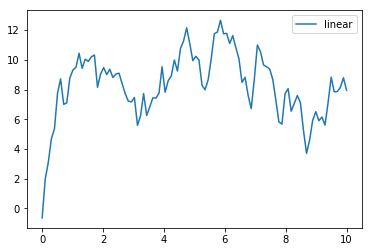

In [0]:
AR(p = 0.8, mu = 1.8, lenght = 100)

**Process MA**

$$
y _ { t } = \mu + \epsilon _ { t } + \theta \epsilon _ { t - 1 }
$$

Moving average (MA) models account for the possibility of a relationship between a variable
and the residuals from previous periods.

In [0]:
def MA(q, mu, lenght):
    list_y =[]
    et_1 = 0
    for i in range(0, lenght):
        et = np.random.normal()
        yt = mu + et + q* et_1
        et_1 = et
        list_y.append(yt)
    ### Plot result
    x = np.linspace(0, 10, lenght)
    plt.plot(x, list_y, label='linear')
    plt.legend()
    plt.show()

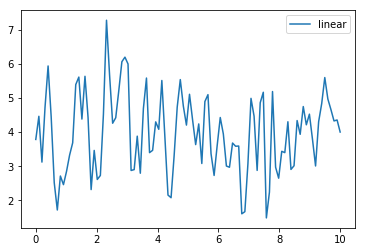

In [0]:
MA(q = 0.8, mu = 4, lenght = 100)

**Process ARMA**

Autoregressive moving average (ARMA) models combine both p autoregressive terms and q
moving average terms, also called ARMA(p,q).

$$
y _ { t } = \mu + \sum _ { i = 1 } ^ { p } \gamma _ { i } y _ { t - i } + \epsilon _ { t } + \sum _ { i = 1 } ^ { q } \theta _ { i } \epsilon _ { t - i }
$$

In [0]:
def ARMA_udf(p, q, mu, lenght, plot = True):
    list_y =[]
    yt_1 = np.random.normal()
    et_1 = 0
    for i in range(0, lenght):
        et = np.random.normal()
        yt = mu + p*yt_1 + et + q*et_1
        et_1 = et
        yt_1 =  yt
        list_y.append(yt)
    ### Plot result
    if plot == True:
        x = np.linspace(0, 10, lenght)
        plt.plot(x, list_y, label='linear')
        plt.legend()
        plt.show()
    else:    
        return list_y

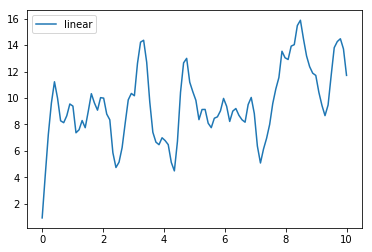

In [0]:
ARMA_udf(p = 0.8, q = 0.7, mu = 2, lenght = 100)

**Computation of p and q with Maximum likelihood method**

- ARMA(1,1) 

Since we are assuming that we have an AR(1,1) process, we know that

$$
y _ { i } = \phi _ { 0 } + \phi _ { 1 } y _ { i - 1 } + \varepsilon _ { i } + \theta _ { 1 } \varepsilon _ { i - 1 }
$$

Solving for the residual, we have

$$
\varepsilon _ { i } = y _ { i } - \phi _ { 0 } - \phi _ { 1 } y _ { i - 1 } - \theta _ { 1 } \varepsilon _ { i - 1 }
$$

We will assume for the moment that $\phi_0 = 0$, ie no constant.

We want to minimize the SSE using the LL:

$$
- 2 L L = n + n L N ( 2 \pi ) + n L N \left( \frac { S S E } { n } \right)
$$

The first step is to generate a serie with given p,q. The optimizer needs to find value close to the serie. 


In [0]:
def fn(para, y):
    T = len(y)
    p = para[0]
    q = para[1]
    e = np.zeros((T, 1))
    for t in range(1, T):
        e[t] = y[t] - p*y[t-1] - q*e[t-1]
    sse = np.sum(e**2)/T
    LL = T + T*np.log(T*np.pi) + T*np.log(sse/T)
    return LL

**Test Optimization**

In [0]:
y = ARMA_udf(p = 0.7, q = 0.7, mu = 2, lenght = 100, plot = False)

In [0]:
para = np.array([0.0001, 0.0001])
fn(para, y)

595.051475153823

In [0]:
from scipy.optimize import minimize
minimize(fn, para, args=(y), method='SLSQP', options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 205.30647652129454
            Iterations: 13
            Function evaluations: 79
            Gradient evaluations: 13


/Users/Thomas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in square
  
/Users/Thomas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in multiply
  import sys


     fun: 205.30647652129454
     jac: array([-0.02173996,  0.01670837])
 message: 'Optimization terminated successfully.'
    nfev: 79
     nit: 13
    njev: 13
  status: 0
 success: True
       x: array([0.98100866, 0.5607655 ])

In [0]:
from statsmodels.tsa.arima_model import ARMA, ARIMA
model = ARMA(y, order=(1, 1)) #5,7 is decided using arma_order_select_ic method
results = model.fit(trend='nc', method='mle')
print(results.summary2())

                          Results: ARMA
Model:              ARMA             BIC:                 286.0283
Dependent Variable: y                Log-Likelihood:      -136.11 
Date:               2018-10-20 17:32 Scale:               1.0000  
No. Observations:   100              Method:              mle     
Df Model:           2                Sample:              0       
Df Residuals:       98                                    0       
Converged:          1.0000           S.D. of innovations: 0.932   
No. Iterations:     7.0000           HQIC:                281.376 
AIC:                278.2128                                      
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
ar.L1.y      0.9633     0.0233   41.3164   0.0000    0.9176   1.0090
ma.L1.y     -0.1058     0.1130   -0.9368   0.3512   -0.3272   0.1156
------------

**Stationarity**

Detrending

- A variable can be detrended by regressing the variable on a time trend and obtaining the
residuals.

$$
y _ { t } = \mu + \beta t + \varepsilon _ { t }
$$

1. Variable $y_t$

detrend formula:

$$
\hat { \varepsilon } _ { t } = y _ { t } - \hat { \mu } + \hat { \beta } t
$$

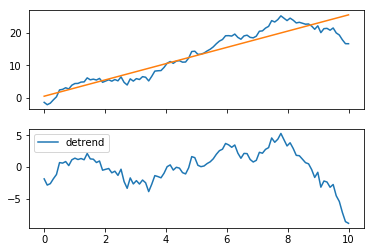

In [0]:
y =AR(p = .978, mu = 0.6, lenght = 100, fit = True)

2. Differencing

When a variable $y_t$ is not stationary, a common solution is to use a differenced variable :

- $\Delta y _ { t } = y _ { t } - y _ { t - 1 }$ for first order differences.
- The variable $y_t$ is integrated of order one, denoted I(1), if taking a first difference produces a
stationary process.
- ARIMA (p,d,q) denotes an ARMA model with p autoregressive lags, q moving average lags, a
and difference in the order of d.

Differenced variable

- $\Delta y _ { t } = y _ { t } - y _ { t - 1 }$

In [0]:
def detrend_dif(y, print = True):
    T = len(y)
    list_delta = []
    for t in range(1, T):
        delta_y = y[t] - y[t-1]
        list_delta.append(delta_y)
    if print == True:
        x = np.linspace(0, 10, T-1)
        plt.plot(x, list_delta, label='first Differenced')
        plt.legend()
        plt.show()
    else:
        return np.array(list_delta)

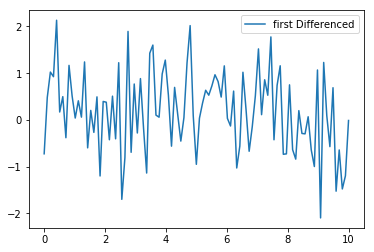

In [0]:
detrend_dif(y)

**Dickey-Fuller Test for Stationarity**

1. Dickey-Fuller test

Assume an AR(1) model. The model is non-stationary or a unit root is present if $| \rho | = 1$

$
\left. \begin{array} { c } { y _ { t } = \rho y _ { t - 1 } + e _ { t } } \\ { y _ { t } - y _ { t - 1 } = \rho y _ { t - 1 } - y _ { t - 1 } + e _ { t } } \\ { \Delta y _ { t } = ( \rho - 1 ) y _ { t - 1 } + e _ { t } = \gamma y _ { t - 1 } + e _ { t } } \end{array} \right.
$

- We can estimate the above model and test for the significance of the $\gamma$ coefficient.
    - If the null hypothesis is not rejected, $\gamma ^ { * } = 0$, then $y_t$ is not stationary. Difference the
variable and repeat the Dickey-Fuller test to see if the differenced variable is stationary.
    - If the null hypothesis is rejected, $\gamma ^ { * } > 0$ tehn $y_t$ is stationary. Use the variable.
    - Note that non-significance is means stationarity.

In [0]:
from scipy.ndimage.interpolation import shift
y_lag = shift(y,-1)[:-1]
y_lag.shape

array([-2.11763848, -1.63729983, -0.61332218,  0.31180054,  2.4451114 ,
        2.61442049,  3.11222185,  2.7307046 ,  3.89776112,  4.41032867,
        4.45028071,  4.85937113,  4.91861149,  6.1595568 ,  5.56131109,
        5.76452317,  5.49745394,  5.99050214,  4.79043617,  5.18545074,
        5.56393546,  5.13893492,  5.64719638,  5.24258443,  6.46675107,
        4.76656809,  3.96139617,  5.85543001,  5.162075  ,  5.93048462,
        5.65049588,  6.53492611,  6.35498419,  5.21779712,  6.64609746,
        8.24785509,  8.35010865,  8.40815717,  9.39100753, 10.67131999,
       11.2025407 , 10.64057256, 11.33661944, 11.45322198, 10.99957452,
       11.04874492, 12.26867861, 14.28718606, 14.37485484, 13.42417951,
       13.46123413, 13.82219189, 14.45681462, 14.9861105 , 15.71409312,
       16.68064757, 17.50237101, 17.99140438, 19.14816173, 19.18123434,
       19.05120712, 19.66806381, 18.63917316, 18.08015606, 19.10020772,
       19.32217003, 18.6510389 , 18.50490514, 19.02117666, 20.54

In [0]:
def df_test(y, y_lag):
    slope, intercept, r_value, p_value, std_err = stats.linregress(y[:-1],y_lag)
    if p_value > 0.05:
        print("Hyp 1 accepted, serie non stationary")
    print("Hyp 1 rejected, serie stationary")

In [0]:
df_test(y, y_lag)

Hyp 1 rejected, serie stationary


In [0]:
y_diff = detrend_dif(y, print = False)

In [0]:
df_test(y, y_diff)

Hyp 1 rejected, serie stationary


**ADF**

The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.

In [0]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
def adf_test(y):
    # perform Augmented Dickey Fuller test
    print('Results of Augmented Dickey-Fuller test:')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic', 'p-value', '# of lags', '# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    print(dfoutput)

In [0]:
adf_test(y_diff)

Results of Augmented Dickey-Fuller test:
test statistic          -3.040782
p-value                  0.031257
# of lags                5.000000
# of observations       93.000000
Critical Value (1%)     -3.502705
Critical Value (5%)     -2.893158
Critical Value (10%)    -2.583637
dtype: float64


**Autocorelation**



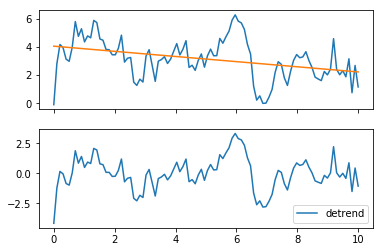

In [0]:
y =AR(p = .8, mu = 0.6, lenght = 100, fit = True)

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def PAC(y, lag = 10): 
    f, (ax1, ax2) = plt.subplots(2, sharex=True)
    plot_acf(y, ax=ax1, lags = lag)
    plot_pacf(y, ax=ax2, lags = lag)
    plt.show()

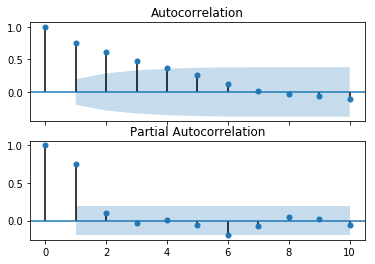

In [0]:
PAC(y)

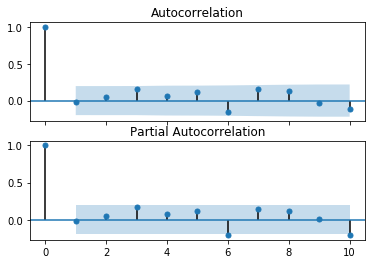

In [0]:
PAC(y_diff)

**ARIMA**

In [0]:
model = ARIMA(y, order=(1, 1, 1)) #5,7 is decided using arma_order_select_ic method
results = model.fit(trend='c', method='mle')
print(results.summary2())

                          Results: ARIMA
Model:              ARIMA            BIC:                 282.2755
Dependent Variable: D.y              Log-Likelihood:      -131.95 
Date:               2018-10-20 17:35 Scale:               1.0000  
No. Observations:   99               Method:              mle     
Df Model:           3                Sample:              1       
Df Residuals:       96                                    0       
Converged:          1.0000           S.D. of innovations: 0.906   
No. Iterations:     36.0000          HQIC:                276.095 
AIC:                271.8950                                      
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const         -0.0122    0.0139   -0.8790  0.3816  -0.0395   0.0151
ar.L1.D.y      0.7955    0.0731   10.8857  0.0000   0.6523   0.9387
ma.L1.D.y     -1

**Test real data**


In [0]:
y = pd.read_csv("timeseries_ppi.csv", index_col = 0, usecols = ["yearqrt","ppi"])
y["dif"] = y.diff(periods=1, axis=0)

In [0]:
y.head(5)

,ppi,dif
yearqrt,,
1960q1,25.400000,NaN
1960q2,25.440001,0.040001
1960q3,25.370001,-0.070000
1960q4,25.400000,0.029999
1961q1,25.490000,0.090000


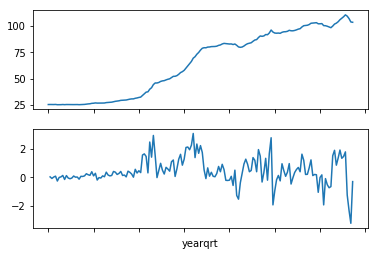

In [0]:
f, (ax1, ax2) = plt.subplots(2, sharex=True)
y.iloc[:,0].plot(ax=ax1)
y.iloc[:,1].plot(ax=ax2)
plt.show()

**Dickey-fuller**

In [0]:
y_nonna = y.dropna()
adf_test(y_nonna.iloc[:,0])

Results of Augmented Dickey-Fuller test:
test statistic           -0.828119
p-value                   0.810723
# of lags                 8.000000
# of observations       159.000000
Critical Value (1%)      -3.472161
Critical Value (5%)      -2.879895
Critical Value (10%)     -2.576557
dtype: float64


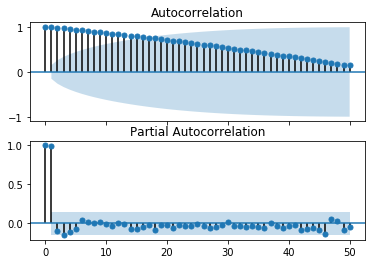

In [0]:
PAC(y_nonna.iloc[:,0], lag = 50)

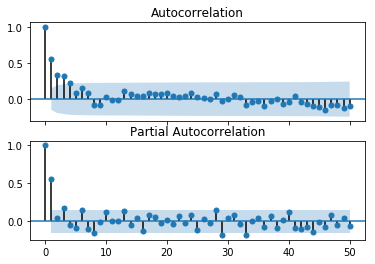

In [0]:
PAC(y_nonna.iloc[:,1], lag = 50)

**Test ARIMA**


In [0]:
def arima(p, q, d, y, forecast = False,n = 10):
    model = ARIMA(y, order=(p, q, d)) #5,7 is decided using arma_order_select_ic method
    results = model.fit(trend='c', method='mle')
    if forecast == False:
        print(results.summary2())
    else:
        return results

In [0]:
## Arima 1, 0, 0: AR 1
arima(p= 1, q=0, d=0, y = y_nonna.iloc[:,0])

                           Results: ARMA
Model:              ARMA             BIC:                 509.8761  
Dependent Variable: ppi              Log-Likelihood:      -247.25   
Date:               2018-10-20 19:04 Scale:               1.0000    
No. Observations:   168              Method:              mle       
Df Model:           2                Sample:              04-01-1960
Df Residuals:       166                                   01-01-2002
Converged:          1.0000           S.D. of innovations: 1.032     
No. Iterations:     18.0000          HQIC:                504.308   
AIC:                500.5043                                        
---------------------------------------------------------------------
               Coef.   Std.Err.      t      P>|t|    [0.025   0.975] 
---------------------------------------------------------------------
const         64.4332   37.9669     1.6971  0.0916  -9.9805  138.8469
ar.L1.ppi      0.9996    0.0005  2000.8064  0.0000   0.998

/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [0]:
## Arima 2, 0, 0: AR 2
arima(p= 2, q=0, d=0, y = y_nonna.iloc[:,0])

/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                           Results: ARMA
Model:              ARMA             BIC:                 425.2670  
Dependent Variable: ppi              Log-Likelihood:      -202.39   
Date:               2018-10-20 19:05 Scale:               1.0000    
No. Observations:   168              Method:              mle       
Df Model:           3                Sample:              04-01-1960
Df Residuals:       165                                   01-01-2002
Converged:          1.0000           S.D. of innovations: 0.788     
No. Iterations:     29.0000          HQIC:                417.843   
AIC:                412.7711                                        
---------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975] 
---------------------------------------------------------------------
const          64.3077   34.3219    1.8737  0.0627  -2.9620  131.5775
ar.L1.ppi       1.6424    0.0357   46.0091  0.0000   1.572

In [0]:
## Arima 0, 0, 1: MA 1
arima(p= 0, q=0, d=1, y = y_nonna.iloc[:,0])

                           Results: ARMA
Model:              ARMA             BIC:                 1411.7495 
Dependent Variable: ppi              Log-Likelihood:      -698.19   
Date:               2018-10-20 19:05 Scale:               1.0000    
No. Observations:   168              Method:              mle       
Df Model:           2                Sample:              04-01-1960
Df Residuals:       166                                   01-01-2002
Converged:          1.0000           S.D. of innovations: 15.206    
No. Iterations:     14.0000          HQIC:                1406.181  
AIC:                1402.3776                                       
----------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
----------------------------------------------------------------------
const        64.9014     2.3394   27.7427   0.0000   60.3162   69.4865
ma.L1.ppi     1.0000     0.0209   47.8056   0.0000    

/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [0]:
## Arima 1, 0, 1: ARMA 11
arima(p= 1, q=0, d=1, y = y_nonna.iloc[:,0])

                           Results: ARMA
Model:              ARMA             BIC:                 451.7912  
Dependent Variable: ppi              Log-Likelihood:      -215.65   
Date:               2018-10-20 19:06 Scale:               1.0000    
No. Observations:   168              Method:              mle       
Df Model:           3                Sample:              04-01-1960
Df Residuals:       165                                   01-01-2002
Converged:          1.0000           S.D. of innovations: 0.853     
No. Iterations:     18.0000          HQIC:                444.367   
AIC:                439.2954                                        
---------------------------------------------------------------------
               Coef.   Std.Err.      t      P>|t|    [0.025   0.975] 
---------------------------------------------------------------------
const         64.7174   37.6375     1.7195  0.0874  -9.0508  138.4857
ar.L1.ppi      0.9994    0.0008  1256.2485  0.0000   0.997

/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [0]:
## Arima 1, 1, 0: ARMA 10 avec drift 1
arima(p= 1, q=1, d=0, y = y_nonna.iloc[:,0])

                           Results: ARIMA
Model:              ARIMA            BIC:                 400.8134  
Dependent Variable: D.ppi            Log-Likelihood:      -192.73   
Date:               2018-10-20 19:07 Scale:               1.0000    
No. Observations:   167              Method:              mle       
Df Model:           2                Sample:              07-01-1960
Df Residuals:       165                                   01-01-2002
Converged:          1.0000           S.D. of innovations: 0.766     
No. Iterations:     6.0000           HQIC:                395.256   
AIC:                391.4594                                        
----------------------------------------------------------------------
                 Coef.    Std.Err.     t      P>|t|    [0.025   0.975]
----------------------------------------------------------------------
const            0.4574     0.1314   3.4822   0.0006   0.2000   0.7149
ar.L1.D.ppi      0.5517     0.0643   8.5806   0.0000 

/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [0]:
## Arima 0, 1, 1: test avec dif: identique a arima(1,1,0) pour une serie non différencier
arima(p= 1, q=0, d=0, y = y_nonna.iloc[:,1])

                           Results: ARMA
Model:              ARMA             BIC:                 402.1614  
Dependent Variable: dif              Log-Likelihood:      -193.39   
Date:               2018-10-20 19:09 Scale:               1.0000    
No. Observations:   168              Method:              mle       
Df Model:           2                Sample:              04-01-1960
Df Residuals:       166                                   01-01-2002
Converged:          1.0000           S.D. of innovations: 0.764     
No. Iterations:     5.0000           HQIC:                396.593   
AIC:                392.7895                                        
-----------------------------------------------------------------------
             Coef.     Std.Err.      t       P>|t|     [0.025    0.975]
-----------------------------------------------------------------------
const        0.4558      0.1307    3.4861    0.0006    0.1995    0.7120
ar.L1.dif    0.5522      0.0640    8.6221    0.000

/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [0]:
## Arima 0, 1, 1: ARMA 10 avec drift 1
arima(p= 0, q=1, d=1, y = y_nonna.iloc[:,0])

                           Results: ARIMA
Model:              ARIMA            BIC:                 412.8647  
Dependent Variable: D.ppi            Log-Likelihood:      -198.76   
Date:               2018-10-20 19:09 Scale:               1.0000    
No. Observations:   167              Method:              mle       
Df Model:           2                Sample:              07-01-1960
Df Residuals:       165                                   01-01-2002
Converged:          1.0000           S.D. of innovations: 0.795     
No. Iterations:     4.0000           HQIC:                407.307   
AIC:                403.5107                                        
----------------------------------------------------------------------
                 Coef.    Std.Err.     t      P>|t|    [0.025   0.975]
----------------------------------------------------------------------
const            0.4676     0.0913   5.1228   0.0000   0.2887   0.6466
ma.L1.D.ppi      0.4870     0.0581   8.3793   0.0000 

/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [0]:
## Arima 0, 1, 1: ARMA 01 identique a arima(1,1,0) pour une serie non différencier
arima(p= 0, q=0, d=1, y = y_nonna.iloc[:,1])

                           Results: ARMA
Model:              ARMA             BIC:                 414.3642  
Dependent Variable: dif              Log-Likelihood:      -199.50   
Date:               2018-10-20 19:10 Scale:               1.0000    
No. Observations:   168              Method:              mle       
Df Model:           2                Sample:              04-01-1960
Df Residuals:       166                                   01-01-2002
Converged:          1.0000           S.D. of innovations: 0.793     
No. Iterations:     5.0000           HQIC:                408.796   
AIC:                404.9923                                        
-----------------------------------------------------------------------
             Coef.     Std.Err.      t       P>|t|     [0.025    0.975]
-----------------------------------------------------------------------
const        0.4654      0.0908    5.1261    0.0000    0.2874    0.6433
ma.L1.dif    0.4872      0.0579    8.4157    0.000

/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [0]:
## Arima 1, 1, 1: ARMA 11 avec drift 
arima(p= 1, q=1, d=1, y = y_nonna.iloc[:,0])

                           Results: ARIMA
Model:              ARIMA            BIC:                 404.3366  
Dependent Variable: D.ppi            Log-Likelihood:      -191.93   
Date:               2018-10-20 19:10 Scale:               1.0000    
No. Observations:   167              Method:              mle       
Df Model:           3                Sample:              07-01-1960
Df Residuals:       164                                   01-01-2002
Converged:          1.0000           S.D. of innovations: 0.763     
No. Iterations:     9.0000           HQIC:                396.927   
AIC:                391.8646                                        
----------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
----------------------------------------------------------------------
const          0.4413     0.1582    2.7889   0.0059    0.1312   0.7514
ar.L1.D.ppi    0.7238     0.1160    6.2387   0.0000  

/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [0]:
## Arima 1, 1, 3: ARMA 13 avec drift 
arima(p= 1, q=1, d=3, y = y_nonna.iloc[:,0])

/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                           Results: ARIMA
Model:              ARIMA            BIC:                 410.3894  
Dependent Variable: D.ppi            Log-Likelihood:      -189.84   
Date:               2018-10-20 19:11 Scale:               1.0000    
No. Observations:   167              Method:              mle       
Df Model:           5                Sample:              07-01-1960
Df Residuals:       162                                   01-01-2002
Converged:          1.0000           S.D. of innovations: 0.753     
No. Iterations:     20.0000          HQIC:                399.275   
AIC:                391.6815                                        
----------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
----------------------------------------------------------------------
const          0.4341     0.1671    2.5985   0.0102    0.1067   0.7615
ar.L1.D.ppi    0.7324     0.1253    5.8468   0.0000  

In [0]:
## Arima 2, 1, 3: ARMA 23 avec drift 
arima(p= 3, q=1, d=2, y = y_nonna.iloc[:,0])

/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                           Results: ARIMA
Model:              ARIMA            BIC:                 402.7424  
Dependent Variable: D.ppi            Log-Likelihood:      -183.46   
Date:               2018-10-20 19:16 Scale:               1.0000    
No. Observations:   167              Method:              mle       
Df Model:           6                Sample:              07-01-1960
Df Residuals:       161                                   01-01-2002
Converged:          1.0000           S.D. of innovations: 0.723     
No. Iterations:     31.0000          HQIC:                389.775   
AIC:                380.9164                                        
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            0.4462    0.1494    2.9869  0.0033   0.1534   0.7390
ar.L1.D.ppi      0.1812    0.0729    2.4851  0.0140   0.0

In [0]:
last = arima(p= 3, q=1, d=2, y = y_nonna.iloc[:,0], forecast = True)

/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
/Users/Thomas/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


In [0]:
from statsmodels.tsa.arima_model import ARMAResults

In [0]:
last.forecast(steps=1, exog=None, alpha=0.05)

(array([102.63524327]),
 array([0.72253912]),
 array([[101.21909262, 104.05139392]]))